In [136]:
import seaborn as sns
import umap.umap_ as umap
%matplotlib inline
%run scripts.py

# UMAP trial - Dimension Reduction
Parameters to use:


Planet: $R, P$

Host Star: $T_{eff}, R_{\star},$[Fe/H]


In [137]:
param_Teff=['obj_orb_period_day','obj_phys_radius_rjup','obj_parent_phys_radius_rsun','obj_parent_phys_feh']
data_US = exo_sol(file_US,cat_solar,param_Teff)
data_US['obj_orb_period_day']=np.log(data_US.obj_orb_period_day)
data_US = data_US.drop('PLUTO')

# redefining groups
* Hot Jupiters: $P < 10$ d, $ R > 0.7 R_J$

* Long period Giants: $R > 0.7 R_J$, $P>100$d

* Super Earths: $R \in [1.5, 3.8] R_{Earth}$, $P<100$d

* Rocky planets: $1.5 < R/R_{Earth}$, $P<100$d

* Neptune-like $R \in [3.8,9] R_{Earth}$, $P>1000$d

In order to visualize data, we plot a pairplot, showing the relationships between every 2 variables. The diagonals represent density distributions for each parameter

/usr/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


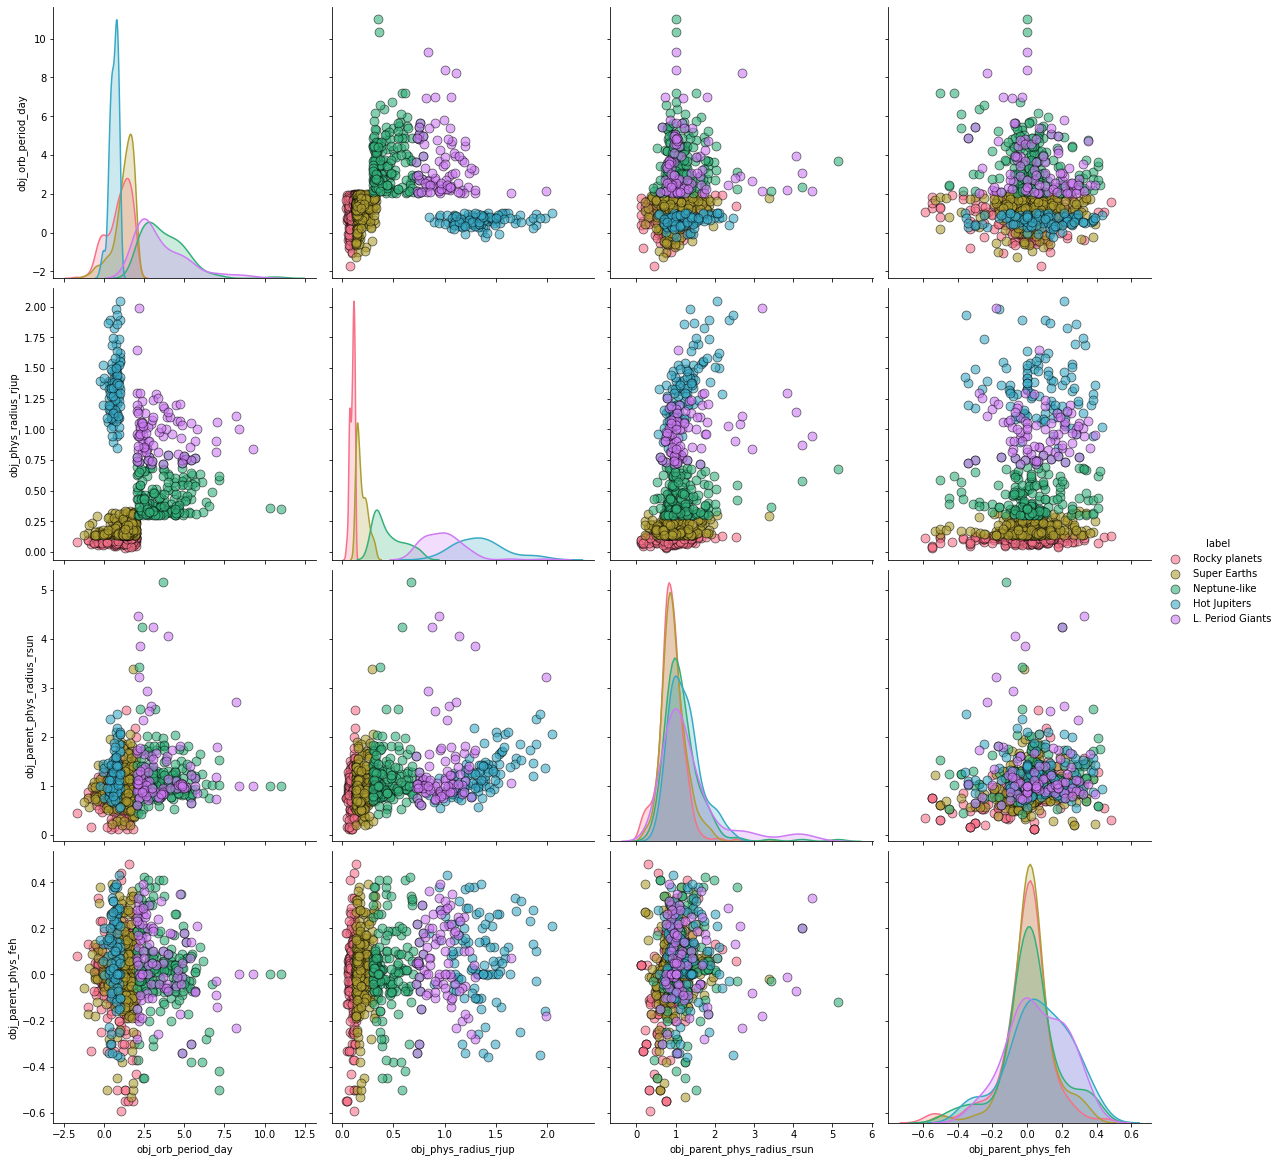

In [142]:
data=label_5g(data_US)
to_emb = data.drop(columns='number')
sns.pairplot(to_emb, vars = param_Teff, hue='label',diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4, palette="husl")

In [143]:
to_emb = to_emb.drop(columns='label')
reducer = umap.UMAP()
embedding = reducer.fit_transform(to_emb)
embedding.shape

(1027, 2)

In [144]:
group_names = ['Rocky planets','Super Earths','Neptune-like','Hot Jupiters','L. Period Giants']
for i in range(5):
    print(group_names[i],len(data.loc[data.number==i]))

Rocky planets 316
Super Earths 337
Neptune-like 185
Hot Jupiters 102
L. Period Giants 87


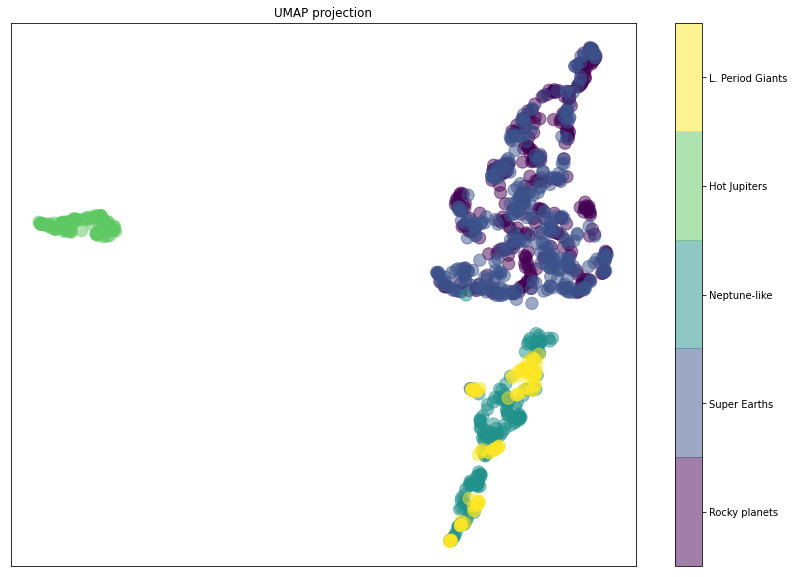

In [159]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, c=data.number, s=150,cmap="viridis", alpha=0.5)
plt.setp(ax, xticks=[], yticks=[])
plt.title('UMAP projection');
cbar = plt.colorbar(boundaries=np.arange(6)-0.5)
cbar.set_ticks(np.arange(6))
cbar.set_ticklabels(group_names)